# Erwin Antepuesto
## Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.

Dataset: Iris<br>
Link: https://archive.ics.uci.edu/dataset/53/iris<br>


### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

In [32]:
from ucimlrepo import fetch_ucirepo 
iris = fetch_ucirepo(id=53) 

X = iris.data.features 
y = iris.data.targets 
  
print(iris.metadata) 
print(iris.variables)
iris

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

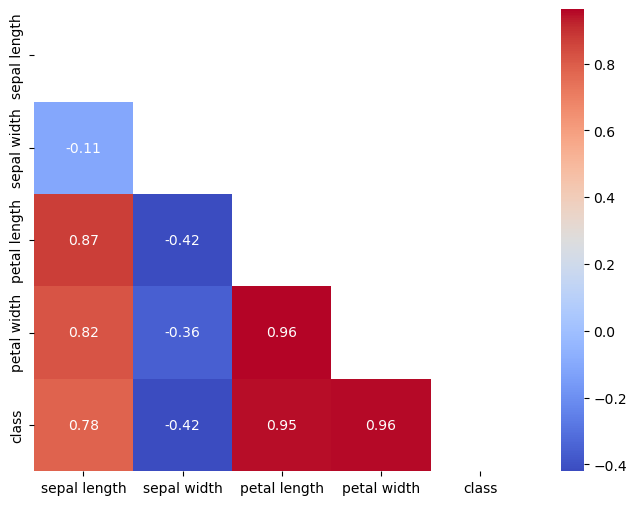

petal width     0.956464
petal length    0.949043
sepal length    0.782561
sepal width     0.419446
Name: class, dtype: float64


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

iris = fetch_ucirepo(id=53)
data = iris.data.features
data['class'] = iris.data.targets

data['class'] = data['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))  

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', ax=ax)
plt.show()

abs_corr = abs(corr['class'])

top_5 = abs_corr.sort_values(ascending=False)[1:6]
print(top_5)

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

>The most correlated frequencies did not reach 5 but they are: petal width and length, sepal length and width.

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [34]:
from sklearn.model_selection import train_test_split

X = iris.data.features
y = iris.data.targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'knn__n_neighbors': range(1, 21)}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Best Parameters: {'knn__n_neighbors': 1}


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

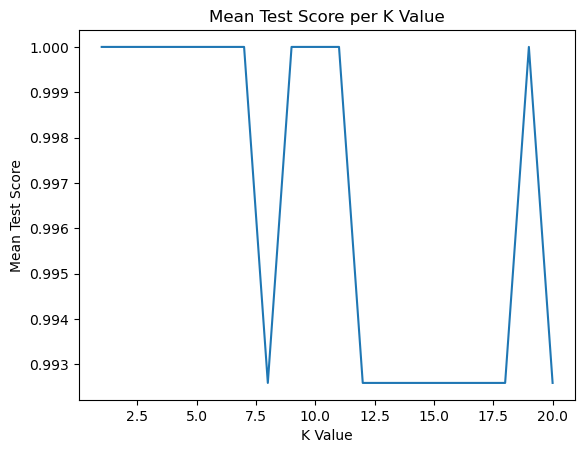

In [37]:
import matplotlib.pyplot as plt

mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.plot(range(1, 21), mean_test_scores)
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score per K Value')
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]
